In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# Data gathering

parameters for a random dataset. 

This dataset will have 10 features per sample and 3 different classes. \


---

Each Class has a label between 0-2 and 10 features. 

Each feature, is a random number drawn from a certain normal distribution which is fixed for each class, and rounded to an integer between 0-10.

1.   "P_below", label=0, normal dist = (below_center, below_std)
2.   "P_bingo", label=1, normal dist = (3, bingo_std)
3.   "P_below", label=2, normal dist = (above_center, above_std)



class parameters

In [32]:
sample_per_class = 300
features = 10

In [33]:
below_center = 0 #@param {type:"slider", min:0, max:2, step:1}
below_std = 2 #@param {type:"slider", min:0, max:5, step:1}

In [34]:
bingo_center = 4
bingo_std = 2 #@param {type:"slider", min:0, max:5, step:1}

In [35]:
above_center = 6 #@param {type:"slider", min:4, max:10, step:1}
above_std = 5   #@param {type:"slider", min:0, max:5, step:1}

data generation

In [36]:
p_below = np.clip(np.random.normal(loc=below_std,scale=below_std,size=(sample_per_class,features)).astype(int),a_min=0,a_max=8)
p_bingo = np.clip(np.random.normal(loc=bingo_center,scale=bingo_std,size=(sample_per_class,features)).astype(int),a_min=0,a_max=8)
p_above = np.clip(np.random.normal(loc=above_center,scale=above_std,size=(sample_per_class,features)).astype(int),a_min=0,a_max=8)

data_cols = [f'game_{idx + 1 }' for idx in range(features)]
label_col = ['label']
df = pd.DataFrame(index=range(sample_per_class * 3), columns= data_cols +label_col)
df[data_cols] = np.concatenate([p_below,p_bingo,p_above])
for idx_class in range(3):
  start_idx = 300 * idx_class
  end_idx = (300 * (idx_class + 1)) - 1
  df.loc[start_idx:end_idx, label_col] = idx_class

X = df[data_cols].to_numpy(dtype=float)
y = df[label_col].to_numpy(dtype=float)

A print of the data - BEFORE the PCA

In [37]:
display(df)

,game_1,game_2,game_3,game_4,game_5,game_6,game_7,game_8,game_9,game_10,label
0,2,2,2,4,2,2,3,2,2,1,0
1,4,2,1,2,1,1,1,0,0,1,0
2,1,1,1,2,1,0,1,1,0,6,0
3,0,1,3,4,4,4,1,0,1,0,0
4,3,0,1,1,4,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
895,8,3,5,7,1,3,4,7,4,1,2
896,2,0,8,5,5,8,6,1,8,6,2
897,3,8,3,8,6,0,3,5,8,2,2
898,7,8,8,8,3,6,6,7,2,6,2


# PCA part

apply PCA to 2 dimentions 

In [38]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(columns=['C1','C2'],
                      data=X_pca
)
pca_df['label'] = y

Visualize

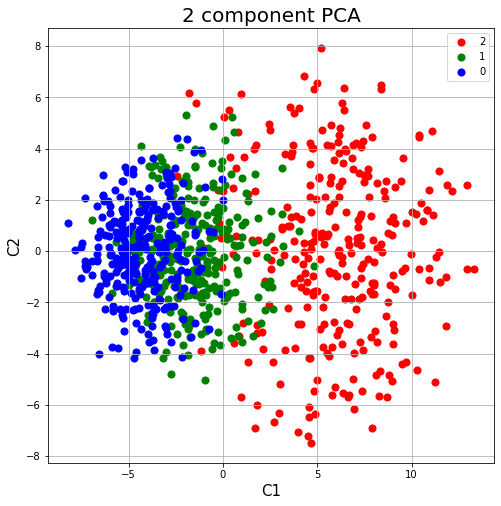

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2, 1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['label'] == target
    pca_df.loc[indicesToKeep, 'C1']
    pca_df.loc[indicesToKeep, 'C2']
    ax.scatter(pca_df.loc[indicesToKeep, 'C1'],
               pca_df.loc[indicesToKeep, 'C2'],
               c= color,
               s=50,
    )
ax.legend(targets)
ax.grid()

The data AFTER PCA

In [40]:
display(pca_df)

,C1,C2,label
0,-2.812393,1.013691,0.0
1,-5.663063,1.119087,0.0
2,-5.395236,1.027200,0.0
3,-4.039284,2.048637,0.0
4,-5.764258,1.157515,0.0
...,...,...,...
895,3.816590,-0.307818,2.0
896,5.687156,2.673794,2.0
897,4.672698,1.511264,2.0
898,9.665679,-0.646834,2.0
